DATA DESCRIPTION
```
file name -> Columns
quater-i.csv -> ['order_id', 'quantity', 'item_id', 'choice_description_id' 'item_price']
items.csv -> ['item_id', 'item_name']
```
Dataset Link - https://drive.google.com/drive/folders/1Z0kaFybvgFeczeUj4dldUnhTdloLqLsL?usp=share_link

### `Q:1-5`
1. You are given three quater files, your job is to append these three files and make a single dataframe.
2. Have a index as Q-1 Q-2 Q-3 for respective quater files in the dataframe
3. Your are given a file items.csv which has item_id and item_name. Find out most sold items in each quarter.
4. Find out items which has made most revenue in each quarter.
5. Find out avg order price of each quarter.

***Note: item_price is given as str with $ sign, in earlier task you have converted this to rupees, here too first convert item_price field in rupees.***

In [13]:
import numpy as np
import pandas as pd
q1= pd.read_csv("quarter-1.csv")
q2 = pd.read_csv("quarter-2.csv")
q3 = pd.read_csv("quarter-3.csv")

items = pd.read_csv("itemsitemid.csv")

In [8]:
import pandas as pd

# Merge q1 and q2 only, since q3 has no data
df = pd.merge(q1, q2, how='outer', on='item_id', suffixes=('_q1', '_q2'))

# Create 'Quarter' column to label rows as 'Q-1' or 'Q-2'
df['Quarter'] = 'Q-2'  # Default to Q-2 for rows with order_id_q2
df.loc[df['order_id_q1'].notnull(), 'Quarter'] = 'Q-1'  # Set Q-1 if order_id_q1 is not null

# Set 'Quarter' as the index
df.set_index('Quarter', inplace=True)

# Display the DataFrame
df

,order_id_q1,quantity_q1,item_id,choice_description_id_q1,item_price_q1,order_id_q2,quantity_q2,choice_description_id_q2,item_price_q2
Quarter,,,,,,,,,
Q-1,13.0,1.0,0,0.0,$2.39,1.0,1.0,0.0,$2.39
Q-1,13.0,1.0,0,0.0,$2.39,25.0,1.0,0.0,$2.39
Q-1,13.0,1.0,0,0.0,$2.39,39.0,1.0,0.0,$2.95
Q-1,13.0,1.0,0,0.0,$2.39,86.0,1.0,0.0,$2.95
Q-1,13.0,1.0,0,0.0,$2.39,115.0,1.0,0.0,$2.39
...,...,...,...,...,...,...,...,...,...
Q-1,1635.0,1.0,48,306.0,$8.49,1094.0,1.0,755.0,$8.49
Q-1,1635.0,1.0,48,306.0,$8.49,1192.0,1.0,149.0,$8.49
Q-1,1635.0,1.0,48,306.0,$8.49,1263.0,1.0,306.0,$8.49


In [34]:

combined = pd.merge(items,df, how='inner' , on='item_id')
# Create 'Quarter' column to label rows as 'Q-1' or 'Q-2'
combined['Quarter'] = 'Q-2'  # Default to Q-2 for rows with order_id_q2
combined.loc[combined['order_id_q1'].notnull(), 'Quarter'] = 'Q-1'  # Set Q-1 if order_id_q1 is not null

# Set 'Quarter' as the index
combined.set_index('Quarter', inplace=True)
# Display the combined DataFrame
combined 

,item_id,item_name,order_id_q1,quantity_q1,choice_description_id_q1,item_price_q1,order_id_q2,quantity_q2,choice_description_id_q2,item_price_q2
Quarter,,,,,,,,,,
Q-1,0,Chips and Fresh Tomato Salsa,13.0,1.0,0.0,$2.39,1.0,1.0,0.0,$2.39
Q-1,0,Chips and Fresh Tomato Salsa,13.0,1.0,0.0,$2.39,25.0,1.0,0.0,$2.39
Q-1,0,Chips and Fresh Tomato Salsa,13.0,1.0,0.0,$2.39,39.0,1.0,0.0,$2.95
Q-1,0,Chips and Fresh Tomato Salsa,13.0,1.0,0.0,$2.39,86.0,1.0,0.0,$2.95
Q-1,0,Chips and Fresh Tomato Salsa,13.0,1.0,0.0,$2.39,115.0,1.0,0.0,$2.39
...,...,...,...,...,...,...,...,...,...,...
Q-1,48,Veggie Salad,1635.0,1.0,306.0,$8.49,1094.0,1.0,755.0,$8.49
Q-1,48,Veggie Salad,1635.0,1.0,306.0,$8.49,1192.0,1.0,149.0,$8.49
Q-1,48,Veggie Salad,1635.0,1.0,306.0,$8.49,1263.0,1.0,306.0,$8.49


In [ ]:
# Grouping and finding most sold item by item_id (no change if already done)
q1_sales = combined.groupby(['item_id', 'Quarter'])['quantity_q1'].sum().reset_index()
q2_sales = combined.groupby(['item_id', 'Quarter'])['quantity_q2'].sum().reset_index()

# Find the most sold item in each quarter
most_sold_q1 = q1_sales[q1_sales['Quarter'] == 'Q-1'].nlargest(1, 'quantity_q1')
most_sold_q2 = q2_sales[q2_sales['Quarter'] == 'Q-2'].nlargest(1, 'quantity_q2')

# 🔄 Merge with items.csv to get item_name
most_sold_q1 = most_sold_q1.merge(items, on='item_id', how='left')
most_sold_q2 = most_sold_q2.merge(items, on='item_id', how='left')
most_sold_q1

,item_id,Quarter,quantity_q1,item_name
0,4,Q-1,137625.0,Chicken Bowl


In [25]:
most_sold_q2

,item_id,Quarter,quantity_q2,item_name
0,47,Q-2,1.0,Veggie Crispy Tacos


In [36]:
combined['item_price_q1'] = combined['item_price_q1'].replace(r'[\$,]', '', regex=True).astype(float)
combined['item_price_q2'] = combined['item_price_q2'].replace(r'[\$,]', '', regex=True).astype(float)

# Calculate revenue (quantity * price) for each row
combined['revenue_q1'] = combined['quantity_q1'] * combined['item_price_q1']
combined['revenue_q2'] = combined['quantity_q2'] * combined['item_price_q2']

# Group by item_id and Quarter to sum revenue
q1_revenue = combined.groupby(['item_id', 'Quarter'])['revenue_q1'].sum().reset_index()
q2_revenue = combined.groupby(['item_id', 'Quarter'])['revenue_q2'].sum().reset_index()

# Find the item with highest revenue in each quarter
most_revenue_q1 = q1_revenue[q1_revenue['Quarter'] == 'Q-1'].nlargest(1, 'revenue_q1')
most_revenue_q2 = q2_revenue[q2_revenue['Quarter'] == 'Q-2'].nlargest(1, 'revenue_q2')

# Merge with items.csv to get item_name
most_revenue_q1 = most_revenue_q1.merge(items, on='item_id', how='left')
most_revenue_q2 = most_revenue_q2.merge(items, on='item_id', how='left')
most_revenue_q1

,item_id,Quarter,revenue_q1,item_name
0,4,Q-1,1444642.5,Chicken Bowl


In [29]:
most_revenue_q2

,item_id,Quarter,revenue_q2,item_name
0,47,Q-2,8.49,Veggie Crispy Tacos


In [40]:
combined.reset_index(inplace=True)

avg_order_price_q1 = combined[combined['Quarter'] == 'Q-1']['revenue_q1'].mean()
avg_order_price_q2 = combined[combined['Quarter'] == 'Q-2']['revenue_q2'].mean()
avg_order_price_q1

np.float64(9.270443474725713)

In [39]:
avg_order_price_q2

np.float64(8.49)

### `Q-6` From the IPL wala dataset you have to find the Purple cap holder each season.

*Note: Bowler with most no wickets in a season gets purple cap. If more than one bowler have same no of wickets in the season, one with least ecomnomy among them is purple cap holder.*

Bowler's Economy = runs-conceded per six balls

In [8]:
import pandas as pd

# Load the datasets
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("ipl-matches.csv")

# Show delivery columns to debug 'wide_runs'
print("Deliveries columns:", deliveries.columns.tolist())

# Rename columns in matches to lowercase versions for consistency
matches.rename(columns={'ID': 'id', 'Season': 'season'}, inplace=True)

# Merge deliveries with matches to get season info
df = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id', how='left')

# If columns exist, continue processing
if 'wide_runs' in df.columns and 'noball_runs' in df.columns and 'batsman_runs' in df.columns:
    # Mark legal deliveries (exclude wides and no-balls)
    df['legal_delivery'] = (df['wide_runs'] == 0) & (df['noball_runs'] == 0)

    # Mark valid wickets (not null and not 'run out')
    df['is_wicket'] = df['player_dismissed'].notna() & (df['dismissal_kind'] != 'run out')

    # Group by season and bowler to calculate stats
    stats = df.groupby(['season', 'bowler']).agg(
        wickets=('is_wicket', 'sum'),
        runs=('batsman_runs', 'sum'),
        balls=('legal_delivery', 'sum')
    ).reset_index()

    # Calculate economy rate
    stats['economy'] = (stats['runs'] / stats['balls'] * 6).round(2)

    # Get Purple Cap holder per season
    purple_cap = stats.sort_values(['season', 'wickets', 'economy'], ascending=[True, False, True]) \
                      .groupby('season').first().reset_index()

    print(purple_cap)
else:
    print(" Required columns like 'wide_runs', 'noball_runs', or 'batsman_runs' are missing.")


Deliveries columns: ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder']
 Required columns like 'wide_runs', 'noball_runs', or 'batsman_runs' are missing.


In [58]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,legal_delivery,is_wicket
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,NaN,NaN,NaN,1.0,2017.0,True,False
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,NaN,NaN,NaN,1.0,2017.0,True,False
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,4,0,4,NaN,NaN,NaN,1.0,2017.0,True,False
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,NaN,NaN,NaN,1.0,2017.0,True,False
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,2,2,NaN,NaN,NaN,1.0,2017.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,1,0,1,NaN,NaN,NaN,NaN,NaN,True,False
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,2,0,2,NaN,NaN,NaN,NaN,NaN,True,False
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,1,0,1,SR Watson,run out,KH Pandya,NaN,NaN,True,False
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,2,0,2,NaN,NaN,NaN,NaN,NaN,True,False


### `Q-7:` Best bowler in death overs.
*Note: Have taken most no of wickets in case of tie with least economy*

Death Overs - [16-20]

In [59]:
# Filter for death overs (16 to 20)
death_overs = df[(df['over'] >= 16) & (df['over'] <= 20)]

# Recalculate stats for death overs
death_stats = death_overs.groupby(['season', 'bowler']).agg(
    wickets=('is_wicket', 'sum'),
    runs=('batsman_runs', 'sum'),
    balls=('legal_delivery', 'sum')
).reset_index()

# Economy in death overs
death_stats['economy'] = (death_stats['runs'] / death_stats['balls'] * 6).round(2)

# Best bowler in death overs per season
best_death_bowler = death_stats.sort_values(['season', 'wickets', 'economy'], ascending=[True, False, True]) \
                               .groupby('season').first().reset_index()

# Display results
best_death_bowler


,season,bowler,wickets,runs,balls,economy
0,2008.0,Sohail Tanvir,16,113,103,6.58
1,2009.0,SL Malinga,13,110,123,5.37
2,2010.0,SL Malinga,8,118,108,6.56
3,2011.0,SL Malinga,15,140,138,6.09
4,2012.0,SP Narine,18,178,157,6.80
5,2013.0,DJ Bravo,24,270,219,7.40
6,2014.0,SP Narine,14,179,168,6.39
7,2015.0,DJ Bravo,23,282,206,8.21
8,2016.0,B Kumar,13,241,162,8.93
9,2017.0,B Kumar,18,187,146,7.68


### `Q-9` Using both dataset, make a dataframe as described below

Data Frame columns-> `['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']`

* BattingFigure->`<runs>/<balls>`
* BowlingFigure->`<wicket>/<runs-conceded>`

DataFrame should have one record for each match.

Say 'V Kohli' got POM award then in dataset include his batting figure of that match. Say he scored 112runs in 76 balls. And he hasn't bowled so Bowling Figure will be NaN
```
PlayerOfThematch BattingFigure BowlingFigure
V Kohli          112/76         nan  

```


In [61]:
# Merge deliveries with matches to get player_of_match info
merged = deliveries.merge(matches[['id', 'player_of_match']], left_on='match_id', right_on='id', how='left')

# Batting stats per player per match
batting = merged.groupby(['match_id', 'batsman']).agg(
    runs=('batsman_runs', 'sum'),
    balls=('ball', 'count')
).reset_index()

batting['BattingFigure'] = batting['runs'].astype(str) + '/' + batting['balls'].astype(str)

# Bowling stats per player per match
# Calculate valid deliveries for each bowler (excluding wides and no-balls)
merged['legal_delivery'] = ~((merged['wide_runs'] > 0) | (merged['noball_runs'] > 0))
merged['is_wicket'] = merged['player_dismissed'].notna() & (merged['dismissal_kind'] != 'run out')

bowling = merged.groupby(['match_id', 'bowler']).agg(
    wickets=('is_wicket', 'sum'),
    runs_conceded=('total_runs', 'sum')
).reset_index()

bowling['BowlingFigure'] = bowling['wickets'].astype(str) + '/' + bowling['runs_conceded'].astype(str)

# Now build final DataFrame using player_of_match from matches
pom_df = matches[['id', 'player_of_match']].rename(columns={'id': 'match_id', 'player_of_match': 'PlayerOfThematch'})

# Merge batting and bowling info for PlayerOfThematch
result = pom_df.merge(batting[['match_id', 'batsman', 'BattingFigure']], 
                      left_on=['match_id', 'PlayerOfThematch'], 
                      right_on=['match_id', 'batsman'], 
                      how='left').drop('batsman', axis=1)

result = result.merge(bowling[['match_id', 'bowler', 'BowlingFigure']], 
                      left_on=['match_id', 'PlayerOfThematch'], 
                      right_on=['match_id', 'bowler'], 
                      how='left').drop('bowler', axis=1)

# Final columns
final = result[['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']]
final


,PlayerOfThematch,BattingFigure,BowlingFigure
0,Yuvraj Singh,62/30,NaN
1,SPD Smith,84/55,NaN
2,CA Lynn,93/46,NaN
3,GJ Maxwell,44/23,NaN
4,KM Jadhav,69/38,NaN
...,...,...,...
631,V Kohli,54/45,NaN
632,AB de Villiers,79/48,NaN
633,MC Henriques,31/21,2/17
634,DA Warner,93/59,NaN


## **Questions Based on Iris Dataset**

- **Sepal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **SepalLengthCm:** Sepal length of flowers in cm
    - **SepalWidthCm:** Sepal width of flowers in cm

- **Petal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **PetalLengthCm:** Petal length of flowers in cm
    - **PetalWidthCm:** Petal width of flowers in cm

- **Iris Virginica:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Versicolor:** https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Setosa:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv
    - **Unnamed 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

### `Q-9:` Plot a bar chart of the average Sepal Length  of Virginica and average Petal length of Setosa flower.

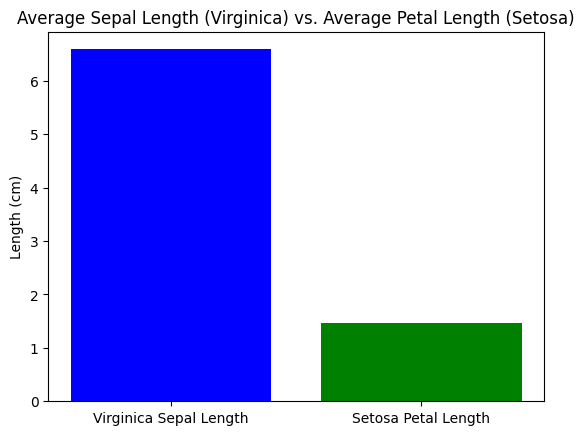

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
sepal_all = pd.read_csv("sepal_all.csv")
petal_all = pd.read_csv("petal_all.csv")
virginica = pd.read_csv("virginica.csv")
setosa = pd.read_csv("setosa.csv")

# Merge to get species
virginica_sepal = sepal_all.merge(virginica[['Id', 'Species']], on='Id')
setosa_petal = petal_all.merge(setosa[['Id', 'Species']], on='Id')

# Calculate averages
avg_sepal_virginica = virginica_sepal['SepalLengthCm'].mean()
avg_petal_setosa = setosa_petal['PetalLengthCm'].mean()

# Prepare data for bar chart
data = {
    'Measurement': ['Virginica Sepal Length', 'Setosa Petal Length'],
    'Average': [avg_sepal_virginica, avg_petal_setosa]
}

# Create bar chart
plt.bar(data['Measurement'], data['Average'], color=['blue', 'green'])
plt.ylabel('Length (cm)')
plt.title('Average Sepal Length (Virginica) vs. Average Petal Length (Setosa)')
plt.show()

### `Q-10:` Create the complete dataset by uisng the below datasets:
- virginica
- versicolor
- setosa
- sepal all
- petal all

This dataset should have these below column names in order:
1. Id
2. Species
3. SepalLengthCm
4. SepalWidthCm
5. PetalLengthCm
6. PetalWidthCm

Also, the dataset should be shuffled means the `Id` column should not be in increasing or decreasing order. So, make a dataset which has the shuffled Id column. You can use `DataFrame.sample()` method to shuffle.

In [81]:
import pandas as pd

# Load datasets
sepal_all = pd.read_csv("sepal_all.csv")
petal_all = pd.read_csv("petal_all.csv")
virginica = pd.read_csv("virginica.csv")
versicolor = pd.read_csv("versicolor.csv")
setosa = pd.read_csv("setosa.csv")

# Combine species datasets
species_all = pd.concat([virginica, versicolor, setosa], ignore_index=True)

# Merge sepal data with species
sepal_with_species = sepal_all.merge(species_all[['Id', 'Species']], on='Id', how='left')

# Merge petal data with the result
complete_data = sepal_with_species.merge(petal_all[['Id', 'PetalLengthCm', 'PetalWidthCm']], on='Id', how='left')

# Select and rename columns in specified order
complete_data = complete_data[['Id', 'Species', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Shuffle the dataset
shuffled_data = complete_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Print result
shuffled_data

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,74,Iris-versicolor,6.1,2.8,4.7,1.2
1,19,Iris-setosa,5.7,3.8,1.7,0.3
2,119,Iris-virginica,7.7,2.6,6.9,2.3
3,79,Iris-versicolor,6.0,2.9,4.5,1.5
4,77,Iris-versicolor,6.8,2.8,4.8,1.4
...,...,...,...,...,...,...
145,72,Iris-versicolor,6.1,2.8,4.0,1.3
146,107,Iris-virginica,4.9,2.5,4.5,1.7
147,15,Iris-setosa,5.8,4.0,1.2,0.2
148,93,Iris-versicolor,5.8,2.6,4.0,1.2


In [70]:
species_all

,Unnamed: 0,Id,Species
0,100,101,Iris-virginica
1,101,102,Iris-virginica
2,102,103,Iris-virginica
3,103,104,Iris-virginica
4,104,105,Iris-virginica
...,...,...,...
145,45,46,Iris-setosa
146,46,47,Iris-setosa
147,47,48,Iris-setosa
148,48,49,Iris-setosa


### `Q-11:` Find out the maximum and minimum sepal width and petal width of Setosa and Versicolor. To do this:
- First create a dataset with merging the required datasets
- After that, use `groupby` to create groups based on the "Species" column.
- Then find out which are asked in this question.


The output should be like this:
```bash
Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4

**************************************************

Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4

**************************************************
```

In [85]:
# Group by Species and compute min/max for SepalWidthCm and PetalWidthCm
stats = complete_data.groupby('Species')[['SepalWidthCm', 'PetalWidthCm']].agg(['min', 'max'])

# Print results for Setosa
print("Minimum Sepal width of Setosa is", stats.loc['Iris-setosa', ('SepalWidthCm', 'min')])
print("Maximum Sepal width of Setosa is", stats.loc['Iris-setosa', ('SepalWidthCm', 'max')])
print("Minimum Petal width of Setosa is", stats.loc['Iris-setosa', ('PetalWidthCm', 'min')])
print("Maximum Petal width of Setosa is", stats.loc['Iris-setosa', ('PetalWidthCm', 'max')])
print("--" * 50 )
# Print results for Versicolor
print("Minimum Sepal width of Versicolor is", stats.loc['Iris-versicolor', ('SepalWidthCm', 'min')])
print("Maximum Sepal width of Versicolor is", stats.loc['Iris-versicolor', ('SepalWidthCm', 'max')])
print("Minimum Petal width of Versicolor is", stats.loc['Iris-versicolor', ('PetalWidthCm', 'min')])
print("Maximum Petal width of Versicolor is", stats.loc['Iris-versicolor', ('PetalWidthCm', 'max')])

Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4
Minimum Petal width of Setosa is 0.1
Maximum Petal width of Setosa is 0.6
----------------------------------------------------------------------------------------------------
Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4
Minimum Petal width of Versicolor is 1.0
Maximum Petal width of Versicolor is 1.8


In [86]:
stats

SepalWidthCm      PetalWidthCm     
                         min  max          min  max
Species                                            
Iris-setosa              2.3  4.4          0.1  0.6
Iris-versicolor          2.0  3.4          1.0  1.8
Iris-virginica           2.2  3.8          1.4  2.5